In [39]:
import pandas as pd

df = pd.read_excel('UAEPopulationByEmiratesNationalityandgender.xlsx')

In [40]:
def descriptive_stats(df, column):
    return df[column].describe()

In [41]:
print(df.columns)

Index(['Emirates_EN', 'Nationality_EN', 'sex_EN', 'year ', 'value '], dtype='object')


In [42]:
sample_random = df.sample(n=150, random_state=42)

desc_random = descriptive_stats(sample_random, 'value ')
print(desc_random)

count       150.000000
mean      61207.126667
std       92927.772837
min         450.000000
25%        7626.000000
50%       26252.500000
75%       68487.500000
max      448927.000000
Name: value , dtype: float64


In [43]:
import numpy as np

N = len(df)
n = 150
k = N // n

indices = np.arange(0, N, k)
sample_systematic = df.iloc[indices]

desc_systematic = descriptive_stats(sample_systematic, 'value ')
print(desc_systematic)

count       160.00000
mean     178582.15000
std      180995.48307
min       25648.00000
25%       61503.50000
50%      116570.50000
75%      207766.50000
max      749893.00000
Name: value , dtype: float64


In [44]:
# Generate detailed descriptive statistics for the dependent variable
desc = df['value '].describe(
    percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
)

print(desc)

count      1120.000000
mean      67833.978571
std      127229.381455
min         450.000000
1%          488.000000
5%         2653.200000
10%        3890.600000
25%        9469.500000
50%       26252.500000
75%       60214.750000
90%      173708.500000
95%      284475.950000
99%      749893.000000
max      920310.000000
Name: value , dtype: float64


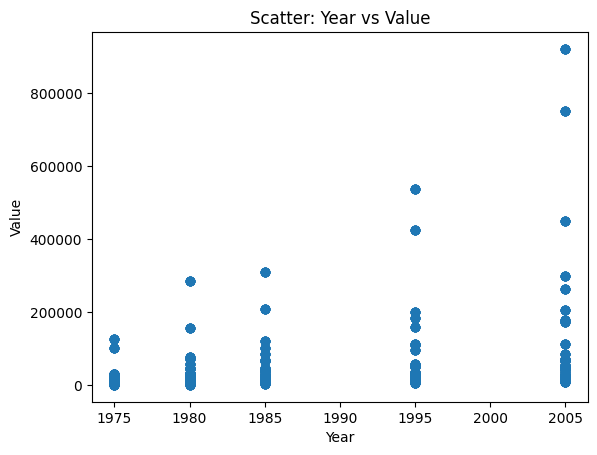

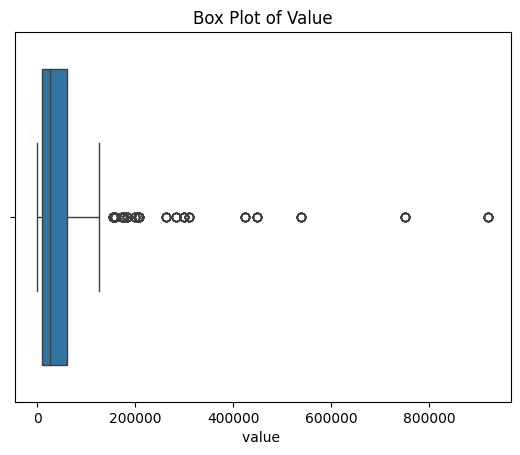

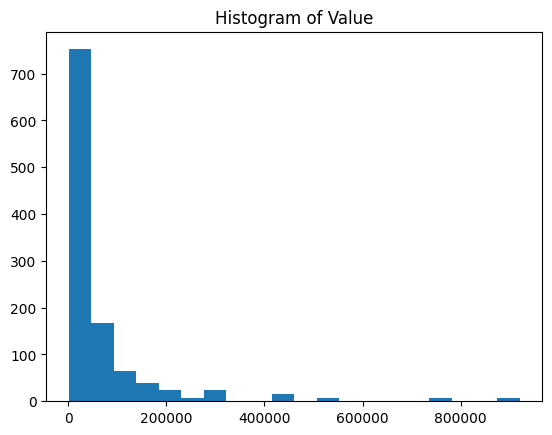

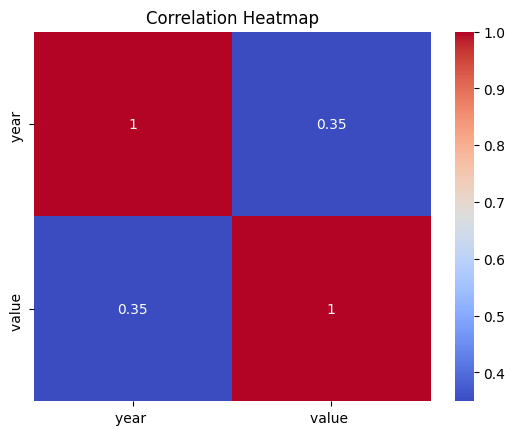

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter
plt.scatter(df['year '], df['value '])
plt.xlabel('Year'); plt.ylabel('Value'); plt.title('Scatter: Year vs Value')
plt.show()

# Box plot
sns.boxplot(x=df['value '])
plt.title('Box Plot of Value')
plt.show()

# Histogram
plt.hist(df['value '], bins=20)
plt.title('Histogram of Value')
plt.show()

# Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
from scipy.stats import pearsonr, spearmanr, chi2_contingency

# Pearson & Spearman (numerical)
pearson_corr = pearsonr(df['year '], df['value '])
spearman_corr = spearmanr(df['year '], df['value '])

# Chi-Square (categorical)
table = pd.crosstab(df['Nationality_EN'], df['sex_EN' ])
chi2, p, dof, expected = chi2_contingency(table)

print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Chi-square:", chi2, "p-value:", p)

Pearson: PearsonRResult(statistic=np.float64(0.349188970523555), pvalue=np.float64(1.8356481239455753e-33))
Spearman: SignificanceResult(statistic=np.float64(0.4639151982535205), pvalue=np.float64(7.493824699517215e-61))
Chi-square: 0.0 p-value: 1.0


In [47]:
from scipy.stats import ttest_1samp

sample = sample_random['value ']
population_mean = df['value '].mean()

t_stat, p_value = ttest_1samp(sample, population_mean)

print("T-statistic:", t_stat, "P-value:", p_value)

T-statistic: -0.8733882924370907 P-value: 0.38385688457931266


In [48]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['year ']]
y = df['value ']

model_simple = LinearRegression()
model_simple.fit(X, y)

print("R²:", model_simple.score(X, y))

R²: 0.12193293713530029


In [49]:
X = df.select_dtypes(include='number').drop(columns=['value '])
y = df['value ']

model_mult = LinearRegression()
model_mult.fit(X, y)

print("R²:", model_mult.score(X, y))

R²: 0.12193293713530029


In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Copy data
df2 = df.copy()

# Convert dependent variable (value) to categories
df2['value_class'] = pd.qcut(df2['value '], q=3, labels=['Low', 'Medium', 'High'])

# Encode the class labels
df2['value_class'] = LabelEncoder().fit_transform(df2['value_class'])

# Select independent variables
X = df2.select_dtypes(include='number').drop(columns=['value ', 'value_class'])
y = df2['value_class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classifiers
log = LogisticRegression(max_iter=1000).fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
nb  = GaussianNB().fit(X_train, y_train)
dt  = DecisionTreeClassifier().fit(X_train, y_train)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

models = {'Logistic': log, 'KNN': knn, 'NaiveBayes': nb, 'DecisionTree': dt}

for name, m in models.items():
    pred = m.predict(X_test)
    print(name)
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Logistic
Accuracy: 0.49404761904761907
Confusion Matrix:
 [[74 17 22]
 [17 71 33]
 [36 45 21]]
KNN
Accuracy: 0.3333333333333333
Confusion Matrix:
 [[61 35 17]
 [44  6 71]
 [40 17 45]]
NaiveBayes
Accuracy: 0.5297619047619048
Confusion Matrix:
 [[ 74  39   0]
 [ 17 104   0]
 [ 36  66   0]]
DecisionTree
Accuracy: 0.5297619047619048
Confusion Matrix:
 [[ 74  39   0]
 [ 17 104   0]
 [ 36  66   0]]


In [52]:
# Question 17
# Predict the dependent variable using the best-fit classifier (Decision Tree)

# Generate predictions on the test set
best_model = dt   # Decision Tree was the best-fit model
y_pred = best_model.predict(X_test)

print("Predictions for the dependent variable (value_class):")
print(y_pred)

Predictions for the dependent variable (value_class):
[0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1
 1 1 1]


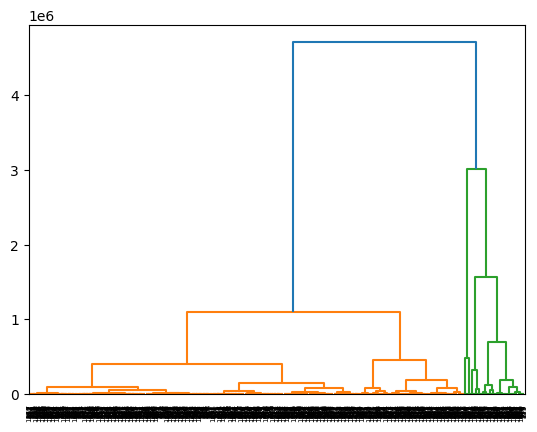

In [53]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

X_cluster = df[['value ']]

kmeans = KMeans(n_clusters=3).fit(X_cluster)
df['Cluster'] = kmeans.labels_

# Hierarchical
link = linkage(X_cluster, method='ward')
dendrogram(link)
plt.show()